**LIBRARY**

In [2]:
pip install numpy pandas opencv-python scikit-learn keras tensorflow


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install deepface


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


**FULL CODE IMPLEMENTATION**

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from datetime import datetime, time
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from keras.models import load_model

# ==== Path Configuration ====
DATASET_PATH = r"C:\Users\Lutifah\Desktop\INTERSHIP\Attendance System Model\dataset"
EMOTION_MODEL_PATH = r"C:\Users\Lutifah\Desktop\INTERSHIP\Attendance System Model\emotion_model.h5"

# ==== Step 1: Load Student Face Dataset ====
def load_face_dataset():
    faces = []
    labels = []
    le = LabelEncoder()
    
    class_names = [f for f in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, f))]
    
    for label in class_names:
        student_folder = os.path.join(DATASET_PATH, label)
        for img_name in os.listdir(student_folder):
            img_path = os.path.join(student_folder, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (100, 100))
                faces.append(img.flatten())
                labels.append(label)
    
    labels_encoded = le.fit_transform(labels)
    return np.array(faces), np.array(labels_encoded), le

X, y, label_encoder = load_face_dataset()

# ==== Step 2: Train Face Recognition Model ====
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
print("\n Face recognition model trained successfully!")

# ==== Step 3: Load Trained Emotion Detection Model ====
emotion_model = load_model(EMOTION_MODEL_PATH, compile=False)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# ==== Step 4: Attendance Monitoring ====
cap = cv2.VideoCapture(0)
attendance_list = []
present_students = set()

start_time = time(9, 30, 0)
end_time = time(10, 0, 0)

print("\n Attendance monitoring started (Allowed Time: 9:30 AM to 10:00 AM)...")
print("Press 'q' or 'Esc' key to stop manually.\n")

while True:
    now = datetime.now().time()
    
    if now < start_time:
        print(f" Waiting... Current time: {now.strftime('%H:%M:%S')} (Start time: 09:30 AM)")
        cv2.waitKey(1000)
        continue

    if now > end_time:
        print("\n Attendance window closed! Stopping monitoring...")
        break

    ret, frame = cap.read()
    if not ret:
        continue

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces_rect = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')\
        .detectMultiScale(gray, 1.3, 5)

    for (x, y_, w, h) in faces_rect:
        face_img = gray[y_:y_+h, x:x+w]
        face_resized = cv2.resize(face_img, (100, 100)).flatten().reshape(1, -1)

        student_id = knn.predict(face_resized)[0]
        student_name = label_encoder.inverse_transform([student_id])[0]

        if student_name in present_students:
            continue

        # Emotion Detection
        face_emotion = cv2.resize(face_img, (48, 48)).reshape(1, 48, 48, 1) / 255.0
        emotion_prediction = emotion_model.predict(face_emotion, verbose=0)
        emotion_detected = emotion_labels[np.argmax(emotion_prediction)]

        # Mark Present
        attendance_list.append({
            'Student': student_name,
            'Emotion': emotion_detected,
            'Time': datetime.now().strftime("%H:%M:%S"),
            'Status': 'Present'
        })
        present_students.add(student_name)

        print(f" Marked: {student_name}, Emotion: {emotion_detected}, Time: {datetime.now().strftime('%H:%M:%S')}")

    cv2.imshow('Attendance System', frame)
    key = cv2.waitKey(30) & 0xFF

    # Optional: Uncomment for debugging key codes
    # print(f"Key pressed: {key}")

    if key == ord('q') or key == 27:  # 'q' or Esc
        print("\n Manual stop triggered by user.")
        break

cap.release()
cv2.destroyAllWindows()

# ==== Step 5: Mark Absent Students ====
all_students = set(label_encoder.classes_)

for student in all_students:
    if student not in present_students:
        attendance_list.append({
            'Student': student,
            'Emotion': 'N/A',
            'Time': 'N/A',
            'Status': 'Absent'
        })

# ==== Step 6: Save Attendance to CSV ====
df_attendance = pd.DataFrame(attendance_list)
output_file = r"C:\Users\Lutifah\Desktop\INTERSHIP\Attendance System Model\attendance_record.csv"
df_attendance.to_csv(output_file, index=False)

print(f"\n Final Attendance (Present/Absent) saved to: {output_file}")



 Face recognition model trained successfully!

 Attendance monitoring started (Allowed Time: 9:30 AM to 10:00 AM)...
Press 'q' or 'Esc' key to stop manually.

 Waiting... Current time: 04:07:41 (Start time: 09:30 AM)
 Waiting... Current time: 04:07:42 (Start time: 09:30 AM)
 Waiting... Current time: 04:07:43 (Start time: 09:30 AM)
 Waiting... Current time: 04:07:44 (Start time: 09:30 AM)
 Waiting... Current time: 04:07:45 (Start time: 09:30 AM)
 Waiting... Current time: 04:07:46 (Start time: 09:30 AM)
 Waiting... Current time: 04:07:47 (Start time: 09:30 AM)
 Waiting... Current time: 04:07:48 (Start time: 09:30 AM)
 Waiting... Current time: 04:07:49 (Start time: 09:30 AM)
 Waiting... Current time: 04:07:50 (Start time: 09:30 AM)
 Waiting... Current time: 04:07:51 (Start time: 09:30 AM)
 Waiting... Current time: 04:07:52 (Start time: 09:30 AM)
 Waiting... Current time: 04:07:53 (Start time: 09:30 AM)
 Waiting... Current time: 04:07:54 (Start time: 09:30 AM)
 Waiting... Current time: 04

**Accuracy Check**

In [8]:
import os
import cv2
import numpy as np
import pandas as pd
from datetime import datetime, time
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from keras.models import load_model
from keras.preprocessing.image import img_to_array

# ==== Path Configuration ====
DATASET_PATH = r"C:\Users\Lutifah\Desktop\INTERSHIP\Attendance System Model\dataset"
EMOTION_MODEL_PATH = r"C:\Users\Lutifah\Desktop\INTERSHIP\Attendance System Model\emotion_model.h5"

# ==== Load Face Dataset ====
def load_face_dataset():
    faces = []
    labels = []
    le = LabelEncoder()
    
    class_names = [f for f in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, f))]
    
    for label in class_names:
        student_folder = os.path.join(DATASET_PATH, label)
        for img_name in os.listdir(student_folder):
            img_path = os.path.join(student_folder, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (100, 100))
                faces.append(img.flatten())
                labels.append(label)
    
    labels_encoded = le.fit_transform(labels)
    return np.array(faces), np.array(labels_encoded), le

# ==== Load data and train model ====
X, y, label_encoder = load_face_dataset()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# ==== Accuracy Check ====
y_pred = knn.predict(X)
train_accuracy = accuracy_score(y, y_pred)
print(f"\n Face Recognition Training Accuracy: {train_accuracy * 100:.2f}%")



 Face Recognition Training Accuracy: 80.00%


**Confusion Matrix**


 Face Recognition Training Accuracy: 80.00%


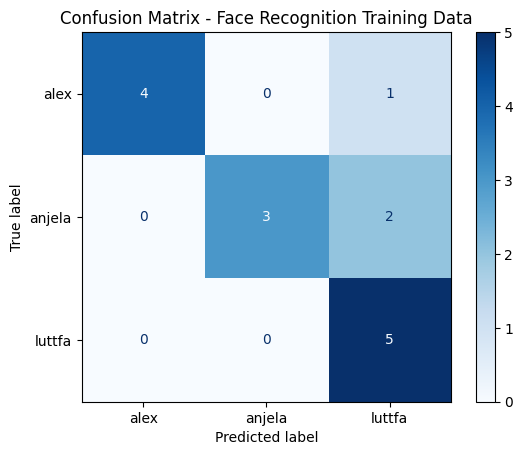

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Training accuracy
y_pred = knn.predict(X)
train_accuracy = accuracy_score(y, y_pred)
print(f"\n Face Recognition Training Accuracy: {train_accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Face Recognition Training Data")
plt.show()
